In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking missing values (NaN Values)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop unnecessary Columns

In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], 1)
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4004\1398947358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], 1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### Checking Unique Values

In [6]:
for i in ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Survived']:
    print("Column:",i)
    print("Unique Values:")
    print(df[i].unique())
    print("")

Column: Pclass
Unique Values:
[3 1 2]

Column: SibSp
Unique Values:
[1 0 3 4 2 5 8]

Column: Parch
Unique Values:
[0 1 2 5 3 4 6]

Column: Embarked
Unique Values:
['S' 'C' 'Q' nan]

Column: Survived
Unique Values:
[0 1]



### Visualizing Distribution of Age on PClass

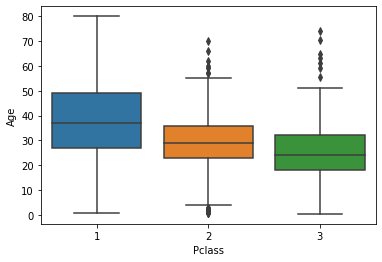

In [7]:
sb.boxplot(data=df, x='Pclass', y='Age')
plt.show()

### Calculating Average Age of Persons for each PClass

In [8]:
avgagep1 = df[df['Pclass']==1]['Age'].mean()
avgagep2 = df[df['Pclass']==2]['Age'].mean()
avgagep3 = df[df['Pclass']==3]['Age'].mean()
print("Average Age of Persons for PClass 1 is", avgagep1)
print("Average Age of Persons for PClass 2 is", avgagep2)
print("Average Age of Persons for PClass 3 is", avgagep3)

Average Age of Persons for PClass 1 is 38.233440860215055
Average Age of Persons for PClass 2 is 29.87763005780347
Average Age of Persons for PClass 3 is 25.14061971830986


In [9]:
r1 = df[df['Pclass']==1][['Age']]
r1.fillna(avgagep1, inplace=True)

r2 = df[df['Pclass']==2][['Age']]
r2.fillna(avgagep1, inplace=True)

r3 = df[df['Pclass']==3][['Age']]
r3.fillna(avgagep1, inplace=True)

In [10]:
r4 = pd.concat([r1, r2, r3], axis=0)
r4.head(10)

,Age
1,38.000000
3,35.000000
6,54.000000
11,58.000000
23,28.000000
27,19.000000
30,40.000000
31,38.233441
34,28.000000
35,42.000000


In [11]:
r4.sort_index(inplace=True)
r4.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [12]:
df['Age'] = r4['Age']

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [14]:
df.dropna(inplace = True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### Some Visualizations:

In [16]:
df.Embarked.isnull().sum()


0

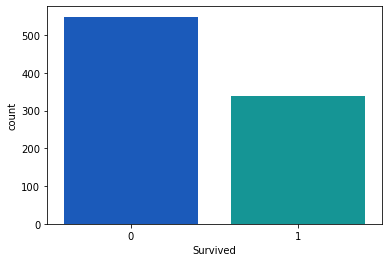

In [123]:
sb.countplot(df.Survived, palette='winter')
plt.show()

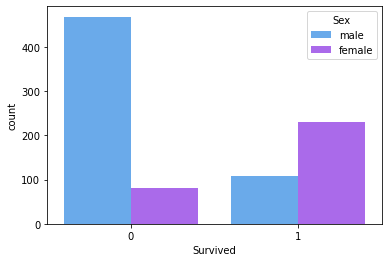

In [124]:
sb.countplot(df.Survived, hue=df.Sex, palette='cool')
plt.show()

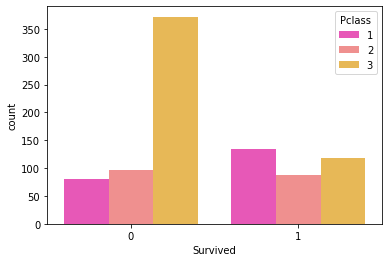

In [125]:
sb.countplot(df.Survived, hue=df.Pclass, palette='spring')
plt.show()

### Creating Dummy Variables

In [126]:
df_new = pd.get_dummies(columns=['Sex', 'Embarked', 'Pclass'], data=df, drop_first=True)

In [127]:
df_new.head()

,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### Seperating Features and Target

In [128]:
x = df_new.iloc[:, 1:].values
y = df_new.iloc[:, 0].values

### Splitting Data into Train-Test

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Creating Predictive model, feeding data to model, predicting testing data on model

In [130]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [131]:
model.fit(x_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [133]:
predicted_probability = model.predict_proba(x_test)
predicted_probability

array([[0.24402941, 0.75597059],
       [0.76295656, 0.23704344],
       [0.8963315 , 0.1036685 ],
       [0.94254492, 0.05745508],
       [0.40478824, 0.59521176],
       [0.8963315 , 0.1036685 ],
       [0.16542968, 0.83457032],
       [0.8891856 , 0.1108144 ],
       [0.45898169, 0.54101831],
       [0.51039101, 0.48960899],
       [0.81078899, 0.18921101],
       [0.17309395, 0.82690605],
       [0.1291171 , 0.8708829 ],
       [0.23642151, 0.76357849],
       [0.10152733, 0.89847267],
       [0.90624331, 0.09375669],
       [0.8209809 , 0.1790191 ],
       [0.9531084 , 0.0468916 ],
       [0.62397791, 0.37602209],
       [0.87396734, 0.12603266],
       [0.72378881, 0.27621119],
       [0.94733499, 0.05266501],
       [0.77913764, 0.22086236],
       [0.23642151, 0.76357849],
       [0.03208396, 0.96791604],
       [0.37779422, 0.62220578],
       [0.78546656, 0.21453344],
       [0.90950816, 0.09049184],
       [0.17588644, 0.82411356],
       [0.83133613, 0.16866387],
       [0.

### Model Evaluation using Accuracy Score and Confusion Matrix

In [134]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.7940074906367042


In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[137,  23],
       [ 32,  75]], dtype=int64)

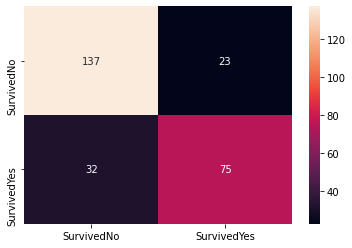

In [136]:
sb.heatmap(cm, annot=True, fmt='d', 
           xticklabels=['SurvivedNo', 'SurvivedYes'],
           yticklabels=['SurvivedNo', 'SurvivedYes'])
plt.show()

### Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score, KFold

In [138]:
kfold = KFold(n_splits=15)

In [139]:
modelCV = LogisticRegression()

In [140]:
scoring = 'accuracy'

In [144]:
scores = cross_val_score(modelCV, x, y, cv=10, scoring='accuracy')

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [145]:
scores

array([0.7752809 , 0.78651685, 0.7752809 , 0.82022472, 0.7752809 ,
       0.78651685, 0.79775281, 0.78651685, 0.83146067, 0.82954545])

In [146]:
print("10-fold cross validation average accuracy: %.3f" % (scores.mean()))

10-fold cross validation average accuracy: 0.796
